## PYTHON JOURNEY MACHINE & DEEP LEARNING
### Trabalho prático usando o Python
### Clusters Analysis usando o algoritmo Density-Based Spatial Clustering (DBSCAN)  

link: ttps://www.youtube.com/watch?v=eq1zKgCFwkk
Case: Implement DBSCAN Clustering and detecting OUTLIERS with Python

In [1]:
# Importar as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
rcParams['figure.figsize'] = 14,6
%matplotlib inline

In [2]:
# Importar a base de dados
df = pd.read_csv('C:/Users/lucas/Downloads/trab6/cadastro.csv')
df.head()

,Unnamed: 0,NUM_CPF,CHAVE_CONTRATO,DATA_NASCIMENTO,RENDA_PRESUMIDA,CEP,LOGRADOURO,NUMERO,COMPLEMENTO,CEP_A,...,NUM_AGENCIA,NUM_CONTA,MARCA_VEICULO,MODELO_VEICULO,PLACA_VEICULO,CNPJ_CREDOR,VALOR_DIVIDA,STATUS_CONSENTIMENTO,DATA_INCLUSAO1,IDADE
0,1,40977545806,1,25/09/1996,1890000.00,2471020,R AUGUSTO VIANA DE CASTELO,26.0,NaN,2471020,...,NaN,NaN,NaN,NaN,NaN,3.774819e+12,220,1,2/26/2019 11:28:49,23.0
1,2,72544350725,2,10/03/1961,1333890.24,1319001,R MARIA PAULA,201.0,AP 52,1319001,...,6571.0,15044.0,FERRARI,355 SPIDER,AFZ6118,4.043254e+13,850,1,2/7/2001 0:00:00,40.0
2,3,10536099812,3,28/11/1965,22000.00,4323120,R DAS JOIAS,202.0,VL DO,4323120,...,7006.0,52946.0,NaN,NaN,NaN,6.169523e+13,142,1,8/23/2018 6:42:12,53.0
3,4,1471742873,4,02/05/1959,16000.00,4136030,R GUARAREMA,430.0,NaN,4136030,...,1850.0,1103486.0,NaN,NaN,NaN,NaN,0,1,NaN,NaN
4,5,954396332,5,10/11/1984,15929.00,8452105,R JOAO DE SIQUEIRA AFONSO,709.0,CAS,8452105,...,123.0,580882.0,NaN,NaN,NaN,3.510965e+13,400,1,11/24/2010 10:30:45,26.0


In [3]:
# Ver os tipos de variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            426 non-null    int64  
 1   NUM_CPF               426 non-null    int64  
 2   CHAVE_CONTRATO        426 non-null    int64  
 3   DATA_NASCIMENTO       426 non-null    object 
 4   RENDA_PRESUMIDA       426 non-null    float64
 5   CEP                   426 non-null    int64  
 6   LOGRADOURO            426 non-null    object 
 7   NUMERO                425 non-null    float64
 8   COMPLEMENTO           206 non-null    object 
 9   CEP_A                 426 non-null    int64  
 10  BAIRRO                390 non-null    object 
 11  CIDADE                426 non-null    object 
 12  UF                    426 non-null    object 
 13  LATITUDE              389 non-null    float64
 14  LONGITUDE             389 non-null    float64
 15  DDD_CELULAR           2

In [8]:
# Quantificar os missing 
df.isna().sum()

Unnamed: 0                0
NUM_CPF                   0
CHAVE_CONTRATO            0
DATA_NASCIMENTO           0
RENDA_PRESUMIDA           0
CEP                       0
LOGRADOURO                0
NUMERO                    0
COMPLEMENTO             200
CEP_A                     0
BAIRRO                   30
CIDADE                    0
UF                        0
LATITUDE                  0
LONGITUDE                 0
DDD_CELULAR             137
CELULAR                 137
DDD_CELULAR_2           232
CELULAR_2               232
COD_BANCO               105
NUM_AGENCIA             105
NUM_CONTA               105
MARCA_VEICULO           388
MODELO_VEICULO          388
PLACA_VEICULO           388
CNPJ_CREDOR               5
VALOR_DIVIDA              0
STATUS_CONSENTIMENTO      0
DATA_INCLUSAO1            5
IDADE                     5
dtype: int64

In [5]:
# Recode os missing
df.replace('nan', np.NaN, inplace=True)

In [6]:
# Apagar as linhas com missing
df = df[df['LONGITUDE'].notna()]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 2 to 423
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            389 non-null    int64  
 1   NUM_CPF               389 non-null    int64  
 2   CHAVE_CONTRATO        389 non-null    int64  
 3   DATA_NASCIMENTO       389 non-null    object 
 4   RENDA_PRESUMIDA       389 non-null    float64
 5   CEP                   389 non-null    int64  
 6   LOGRADOURO            389 non-null    object 
 7   NUMERO                389 non-null    float64
 8   COMPLEMENTO           189 non-null    object 
 9   CEP_A                 389 non-null    int64  
 10  BAIRRO                359 non-null    object 
 11  CIDADE                389 non-null    object 
 12  UF                    389 non-null    object 
 13  LATITUDE              389 non-null    float64
 14  LONGITUDE             389 non-null    float64
 15  DDD_CELULAR           2

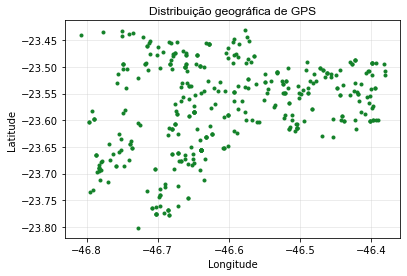

In [9]:
# Gráfico da longitude e latitude
_=plt.plot(df['LONGITUDE'], df['LATITUDE'], marker='.', linewidth=0, color='#128128')
_=plt.grid(which='major', color='#cccccc', alpha=0.45)
_=plt.title('Distribuição geográfica de GPS', family ='Arial', fontsize=12)
_=plt.xlabel('Longitude')
_=plt.ylabel('Latitude')
_=plt.show()

In [10]:
# Preparar os dados para o modelo
dbscan_df = df[['LONGITUDE', 'LATITUDE']]
dbscan_df = dbscan_df.values.astype('float32', copy=False) 
dbscan_df

array([[-46.639023, -23.65578 ],
       [-46.626034, -23.610065],
       [-46.39493 , -23.539482],
       [-46.588783, -23.623705],
       [-46.671124, -23.625935],
       [-46.68023 , -23.664135],
       [-46.645515, -23.494736],
       [-46.63869 , -23.549086],
       [-46.75756 , -23.53088 ],
       [-46.469555, -23.629314],
       [-46.77918 , -23.67895 ],
       [-46.573086, -23.522884],
       [-46.3992  , -23.491854],
       [-46.5745  , -23.44483 ],
       [-46.660065, -23.495098],
       [-46.41442 , -23.532614],
       [-46.759144, -23.68588 ],
       [-46.442734, -23.59996 ],
       [-46.68577 , -23.62683 ],
       [-46.702984, -23.776804],
       [-46.678818, -23.47873 ],
       [-46.79022 , -23.598352],
       [-46.488083, -23.549376],
       [-46.62404 , -23.626818],
       [-46.632305, -23.630608],
       [-46.64698 , -23.55309 ],
       [-46.649944, -23.672234],
       [-46.438557, -23.601364],
       [-46.60703 , -23.59466 ],
       [-46.62404 , -23.626818],
       [-4

In [11]:
# Padronizar os dados usando a Distribuição Normal Padrão
dbscan_df_scaler = StandardScaler().fit(dbscan_df)
dbscan_df = dbscan_df_scaler.transform(dbscan_df)
dbscan_df

array([[-3.00412476e-01, -9.42075312e-01],
       [-1.86288327e-01, -3.98293972e-01],
       [ 1.84421659e+00,  4.41291004e-01],
       [ 1.41001642e-01, -5.60534477e-01],
       [-5.82454920e-01, -5.87056518e-01],
       [-6.62459135e-01, -1.04144788e+00],
       [-3.57457787e-01,  9.73547041e-01],
       [-2.97496527e-01,  3.27057928e-01],
       [-1.34190845e+00,  5.43613017e-01],
       [ 1.18856418e+00, -6.27259314e-01],
       [-1.53184724e+00, -1.21766412e+00],
       [ 2.78922617e-01,  6.38720334e-01],
       [ 1.80671144e+00,  1.00782824e+00],
       [ 2.66487926e-01,  1.56717336e+00],
       [-4.85290259e-01,  9.69236314e-01],
       [ 1.67298007e+00,  5.22989810e-01],
       [-1.35581791e+00, -1.30011153e+00],
       [ 1.42421961e+00, -2.78093964e-01],
       [-7.11125314e-01, -5.97697139e-01],
       [-8.62385929e-01, -2.38163948e+00],
       [-6.50058031e-01,  1.16394305e+00],
       [-1.62884438e+00, -2.58968145e-01],
       [ 1.02577388e+00,  3.23609382e-01],
       [-1.

In [17]:
# Parâmetros do modelo DBSCAN
'''
-- min_samples :: requires a minimum 20 data points in a neighboardhood
-- eps :: in radius 0.02
'''
modelo = DBSCAN(eps=0.1, min_samples=5, metric='euclidean').\
         fit(dbscan_df)
modelo

DBSCAN(eps=0.1)

In [18]:
# Identificar os outliers 
outliers_df = df[modelo.labels_ == -1]
clusters_df = df[modelo.labels_ != -1]

colors = modelo.labels_
colors_clusters = colors[colors != -1]
colors_outliers = 'black'

clusters = Counter(modelo.labels_)
print(clusters)
print(df[modelo.labels_ == -1].head())
print('Número de clusters = {}'.format(len(clusters)-1))

Counter({-1: 235, 0: 11, 9: 11, 15: 11, 19: 9, 3: 7, 14: 7, 7: 7, 11: 7, 17: 6, 10: 6, 16: 6, 20: 6, 1: 5, 18: 5, 2: 5, 4: 5, 5: 5, 6: 5, 12: 5, 8: 5, 23: 5, 13: 5, 22: 5, 21: 5})
   Unnamed: 0      NUM_CPF  CHAVE_CONTRATO DATA_NASCIMENTO  RENDA_PRESUMIDA  \
3           4   1471742873               4      02/05/1959         16000.00   
4           5    954396332               5      10/11/1984         15929.00   
5           6   6047033849               6      13/10/1940         15790.12   
6           7     94700508               7      17/03/1971         15600.00   
9          10  46680969034              10      21/10/1967          9500.00   

       CEP                 LOGRADOURO  NUMERO COMPLEMENTO    CEP_A  ...  \
3  4136030                R GUARAREMA   430.0         NaN  4136030  ...   
4  8452105  R JOAO DE SIQUEIRA AFONSO   709.0         CAS  8452105  ...   
5  4241100             R ROMEU TARZIA    94.0        CS 2  4241100  ...   
6  4619032         R VICENTE LEPORACE  1100.0

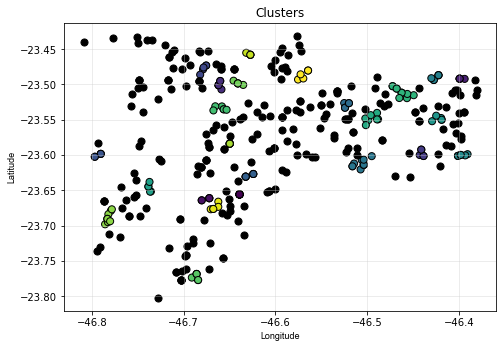

In [19]:
# Visualizar os clusters

fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])
ax.scatter(clusters_df['LONGITUDE'], clusters_df['LATITUDE'], c=colors_clusters, edgecolors='black', s=50)
ax.scatter(outliers_df['LONGITUDE'], outliers_df['LATITUDE'], c=colors_outliers, edgecolors='black', s=50)
ax.set_xlabel('Longitude', family = 'Arial', fontsize = 9)
ax.set_ylabel('Latitude', family = 'Arial', fontsize = 9)

plt.title('Clusters')
plt.grid(which='major', color='#cccccc', alpha=0.45)

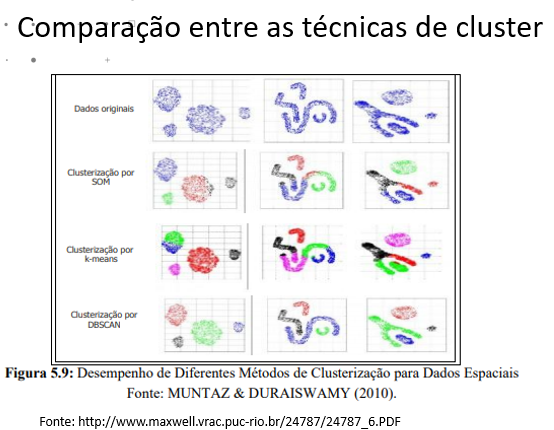